In [1]:
library(ggplot2)
library(scales)
library(segmented)
options(repr.plot.height=5)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
df = read.csv('clean.csv')

Fit a segmented exponential model.

In [3]:
normal.model = lm(log(quant) ~ date, data=df)
segmented.model = segmented(normal.model, data=df)

Add the prediction intervals.

In [4]:
pred = data.frame(date=df$date);
pred2022 = data.frame(date=2022);
pred = rbind(pred, pred2022);

In [5]:
pred[,c("quant", "lwr90", "upr90")] = apply(
    predict(
    segmented.model, 
    newdata=pred, 
    interval="prediction", 
    level=0.90
), 2, exp);

In [6]:
pred[,c("quant", "lwr70", "upr70")] = apply(predict(
    segmented.model, 
    newdata=pred, 
    interval="prediction", 
    level=0.70
), 2, exp);

In [7]:
pred[,c("quant", "lwr50", "upr50")] = apply(predict(
    segmented.model, 
    newdata=pred, 
    interval="prediction", 
    level=0.50
), 2, exp);

In [8]:
pred[,c("quant", "lwr20", "upr20")] = apply(predict(
    segmented.model, 
    newdata=pred, 
    interval="prediction", 
    level=0.20
), 2, exp);

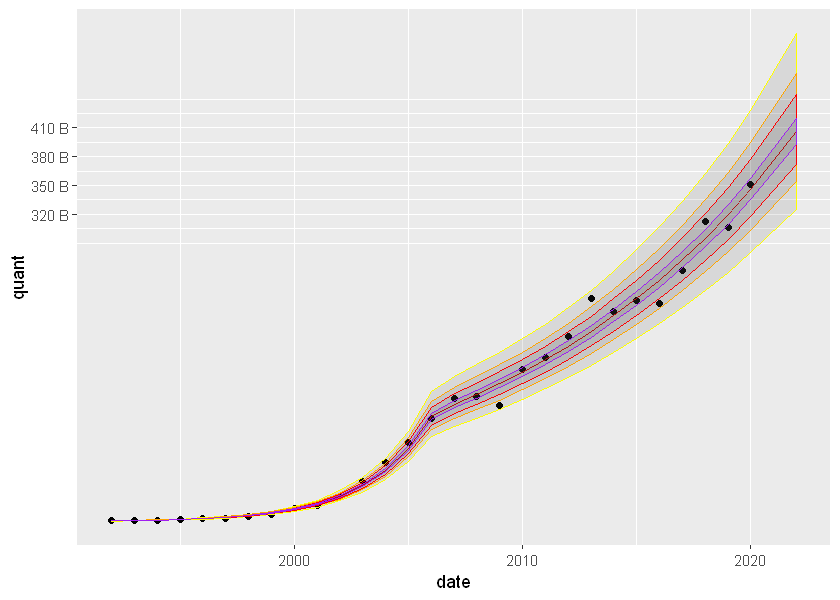

In [9]:
ggplot(df, aes(date, quant)) +
geom_point() +
geom_line(data=pred, aes(date, quant), color="red") +
geom_ribbon(data=pred, aes(ymin=lwr90, ymax=upr90), color="yellow", alpha=0.1) +
geom_ribbon(data=pred, aes(ymin=lwr70, ymax=upr70), color="orange", alpha=0.1) +
geom_ribbon(data=pred, aes(ymin=lwr50, ymax=upr50), color="red", alpha=0.1) +
geom_ribbon(data=pred, aes(ymin=lwr20, ymax=upr20), color="purple", alpha=0.1) +
scale_y_continuous(labels= unit_format(unit="B", scale=1e-9), breaks=c(3.2e11, 3.5e11, 3.8e11, 4.1e11))
ggsave("graph.png", width=4, height=2)

In [10]:
summary(segmented.model)


	***Regression Model with Segmented Relationship(s)***

Call: 
segmented.lm(obj = normal.model, data = df)

Estimated Break-Point(s):
               Est. St.Err
psi1.date 2006.118    0.3

Meaningful coefficients of the linear terms:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.901e+02  1.327e+01  -52.00   <2e-16 ***
date         3.567e-01  6.638e-03   53.73   <2e-16 ***
U1.date     -2.767e-01  9.915e-03  -27.91       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1111 on 25 degrees of freedom
Multiple R-Squared: 0.9972,  Adjusted R-squared: 0.9968 

Convergence attained in 4 iter. (rel. change 0)